# Metoda ponovnega vzorčenja (bootstrap)

> [Metoda stremena (angl. bootstrap)](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) 
> * iz **porazdelitve vzorca** sklepamo o **porazdelitvi na celotni populaciji**
> * ponovno vzorčenje
>  * iz vzorca s ponavljanjem izbiramo elemente, da dobimo nove vzorce
> * spada med [metode ponovnega vzorčenja](https://en.wikipedia.org/wiki/Resampling_(statistics))



## Baron Munchausen se za lase povleče iz močvirja
[![Baron munchausen se povleče za lase](https://img.huffingtonpost.com/asset/5b6b3e792000009f00379402.jpeg?ops=scalefit_720_noupscale)](https://img.huffingtonpost.com/asset/5b6b3e792000009f00379402.jpeg?ops=scalefit_720_noupscale)

# Primer - ocena kolokvijev

In [6]:
import matplotlib.pyplot as plt
import statistics
from statistics import mean, stdev
import numpy as np
from scipy import stats
import random

In [24]:
ocene = np.array([10,9,10,9,10,5,2,10,8,7,10,10])
xp = np.mean(ocene)
print("Povprečno število točk za nalogo: {:.2f}".format(xp))

Povprečno število točk za nalogo: 8.33


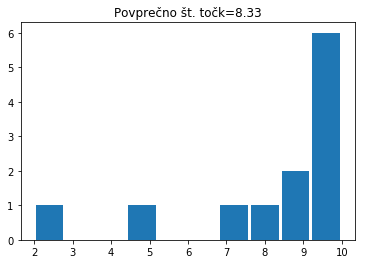

In [25]:
plt.hist(ocene, rwidth=0.9)
plt.title("Povprečno št. točk={:.2f}".format(xp));

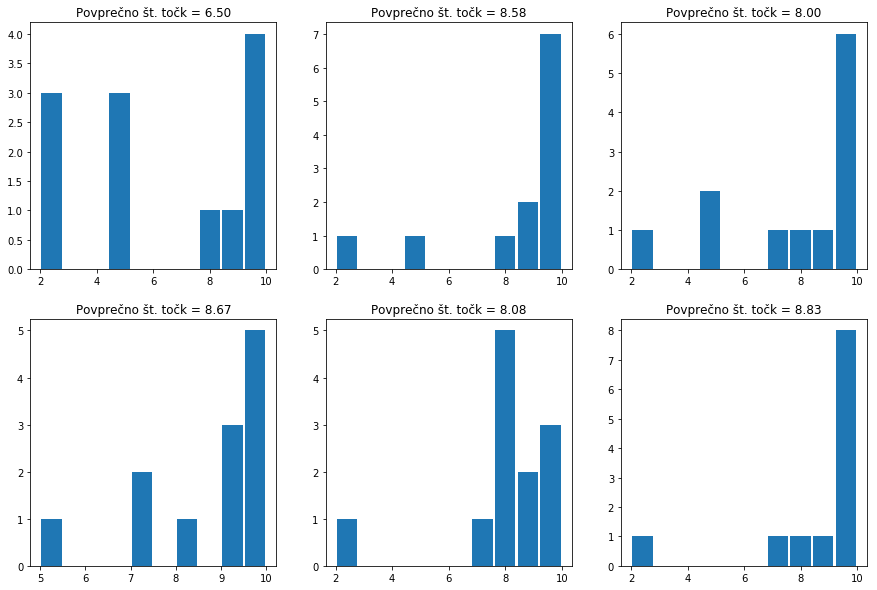

In [26]:
fig = plt.figure(figsize=(15, 10))
for i in range(6):
    vzorec = random.choices(ocene, k=len(ocene))
    fig.add_subplot(2, 3, i+1)
    plt.title("Povprečno št. točk = {:.2f}".format(np.mean(vzorec)))
    plt.hist(vzorec, rwidth=0.9)

In [27]:
N = 10000
vzorec_ocen = []
for i in range(N):
    vzorec = random.choices(ocene, k=len(ocene))
    xp = np.mean(vzorec)
    vzorec_ocen.append(xp)

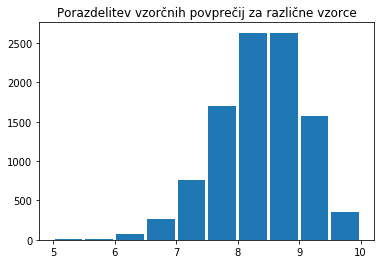

In [28]:
plt.hist(vzorec_ocen, rwidth=0.9)
plt.title("Porazdelitev vzorčnih povprečij za različne vzorce");

### Intervali zaupanja
Izračunajmo 95% interval zaupanja za število točk na kolokvijih.

In [29]:
bs_int = np.percentile(vzorec_ocen, [2.5, 97.5])
print("Interval zaupanja bootstrap: [{:.2f}, {:.2f}]".format(*bs_int))

Interval zaupanja bootstrap: [6.83, 9.50]


In [30]:
xp = np.mean(ocene)
s = stats.sem(ocene)
cli_int = stats.norm.interval(0.95, loc=xp, scale=s/len(ocene)**0.5)
print("Interval zaupanja CLI: [{:.2f}, {:.2f}]".format(*cli_int))

Interval zaupanja CLI: [7.92, 8.75]


In [31]:
t_int = stats.t.interval(0.95, len(ocene)-1, loc=xp, scale=s/len(ocene)**0.5)
print("Interval zaupanja Student/t-test: [{:.2f}, {:.2f}]".format(*t_int))

Interval zaupanja Student/t-test: [7.87, 8.80]


# Primer - regresija

In [2]:
import pandas as pd
podatki = pd.read_csv("podatki/visine.csv")
podatki.head()

,weight,height
0,77,182
1,68,177
2,76,170
3,76,167
4,69,186


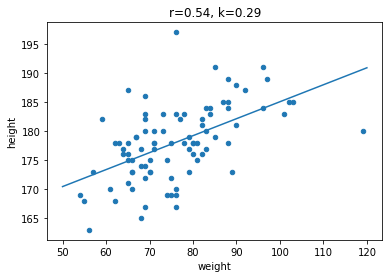

In [3]:
podatki.plot.scatter("weight", "height")
a, b, r, p, stderr = stats.linregress(podatki.weight, podatki.height)
plt.plot([50, 120], [a*50+b, a*120+b])
plt.title("r={:.2f}, k={:.2f}".format(r, a));

<Figure size 1080x720 with 0 Axes>

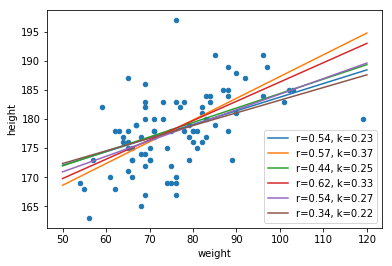

In [13]:
n = len(podatki)
fig = plt.figure(figsize=(15, 10))
podatki.plot.scatter("weight", "height")
for i in range(6):
    vzorec_idx = [random.randint(0,n-1) for _ in range(n)]
    vzorec = podatki.loc[vzorec_idx]
    a, b, r, p, stderr = stats.linregress(vzorec.weight, vzorec.height)
    plt.plot([50, 120], [a*50+b, a*120+b], label="r={:.2f}, k={:.2f}".format(r, a))
plt.legend();

In [14]:
## Bootstrap za r
N = 10000
vzorec_r = []
vzorec_a = []
for i in range(N):
    vzorec_idx = [random.randint(0,n-1) for _ in range(n)]
    vzorec = podatki.loc[vzorec_idx]
    a, b, r, p, stderr = stats.linregress(vzorec.weight, vzorec.height)
    vzorec_r.append(r)
    vzorec_a.append(a)

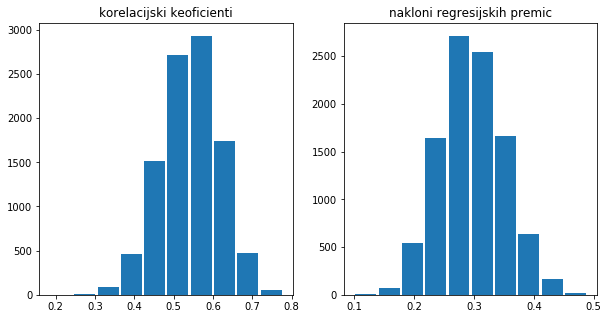

In [23]:
fig = plt.figure(figsize=(10, 5))
fig.add_subplot(1, 2, 1)
plt.hist(vzorec_r, rwidth=0.9)
plt.title("korelacijski keoficienti")
fig.add_subplot(1,2,2)
plt.hist(vzorec_a, rwidth=0.9)
plt.title("nakloni regresijskih premic");

In [21]:
bs_int = np.percentile(vzorec_r, [2.5, 97.5])
print("Interval zaupanja za r: [{:.2f}, {:.2f}]".format(*bs_int))

Interval zaupanja za r: [0.39, 0.68]


# Metoda bootstrap - zaključek

* Z metodo bootstrap lahko dobro ocenimo **porazdelitev** in **intervale zaupanja** za parametre, ki nas zanimajo v praksi (pričakovana vrednost, odklon, mediana, korelacijski koeficient, regresijski koeficient, ...), ne da bi poznali teoretično ozadje
* Predstavili smo najbolj enostavno različico in sicer neparametrični bootstrap. Obstaja več različic metode bootstrap ( [parametrični bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29#Parametric_bootstrap), [Bayesovski bootstrap](https://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29#Bayesian_bootstrap), ...)

## Prednosti
* bootstrap je enostavna metoda, ki omogoča ocenjevanje intervalov zaupanja
* bootstrap deluje tudi za preučevanje kompliciranih lastnosti, čeprav porazdelitve ne znamo analitično opisati

## Slabosti
* metoda bootstrap deluje le, če so izpolnjeni določeni pogoji npr. neodvisno vzorčenje, ki pri metodi bootstrap niso tako poudarjeni
* široka uporabnost in enostavnost pomeni, da se metoda uporabi, čeprav se ne bi smela 